# **Credit Card Users Churn Prediction**

----------------------
# **Problem Statement**
----------------------

The Thera bank recently saw a steep decline in the number of credit card users. Credit cards are a good source of money for banks because of several types of fees charged by the banks, such as annual fees, balance transfer costs, cash advance fees, late payment fees, international transaction fees, and others. Some costs are assessed to all users regardless of consumption, while others are assessed only under specific conditions.

Customers leaving credit card services would result in a loss for the bank, so the bank wants to analyse customer data to identify customers who will leave their credit card services and the reasons for doing so – so that the bank can improve in those areas.

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards. **You need to identify the best possible model that will give the required performance**.

------------------------------------
## **Dataset Description**
------------------------------------
* **CLIENTNUM** - Client number. Unique identifier for the customer holding the account 
* **Attrition_Flag** - Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer" 
* **Customer_Age** - Age in Years
* **Gender** - Gender of the account holder
* **Dependent_count** - Number of dependents 
* **Education_Level** - Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* **Marital_Status** - Marital Status of the account holder
* **Income_Category** - Annual Income Category of the account holder
* **Card_Category** - Type of Card
* **Months_on_book** - Period of relationship with the bank (in months)
* **Total_Relationship_Count** - Total no. of products held by the customer
* **Months_Inactive_12_mon** - No. of months inactive in the last 12 months
* **Contacts_Count_12_mon** - No. of Contacts in the last 12 months
* **Credit_Limit** - Credit Limit on the Credit Card
* **Total_Revolving_Bal** - Total Revolving Balance on the Credit Card
* **Avg_Open_To_Buy** - Open to Buy Credit Line (Average of last 12 months)
* **Total_Amt_Chng_Q4_Q1** - Change in Transaction Amount (Q4 over Q1)
* **Total_Trans_Amt** - Total Transaction Amount (Last 12 months)
* **Total_Trans_Ct** - Total Transaction Count (Last 12 months)
* **Total_Ct_Chng_Q4_Q1** - Change in Transaction Count (Q4 over Q1)
* **Avg_Utilization_Ratio** - Average Card Utilization Ratio


#### **What is a Revolving Balance?**

* If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance.


#### **What is the Average Open to buy?**

* 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

#### **What is the Average utilization Ratio?**

* The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


**Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:**

* ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

-------------------------------------------------------------------

### **Importing the libraries and overview of the dataset**

In [27]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# Setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression

# To build classification models 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

### **Loading Data**

In [28]:
# abrimos sesión Google drive en Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
path = "/content/drive/MyDrive/Colab Notebooks/MIT_MLDS_2023/Mentored Sessions/BankChurners.csv"
df_Drive = pd.read_csv(path)
# Dataset is now stored in a Pandas Dataframe

churn = df_Drive


In [30]:
# Loading the dataset si solo quiero verla temporalmente
# churn = pd.read_csv("BankChurners.csv")

### **Carguemos a GitHub (OPCIONAL) *No Correr si no lo necesitaremos!**

##### *(subir a GitHub primero, luego llamarlo)*

In [31]:
# From Github (Files < 25MB)
# Click on the dataset in your repository, then click on View Raw. Copy the link
# to the raw dataset and store it as a string variable called url in Colab 
# as shown below
url = 'https://raw.githubusercontent.com/Kokit0/Great-Learning---Machine-Learning-Case-Studies-2023/main/BankChurners.csv'
df_gh = pd.read_csv(url)
churn = df_gh
# Dataset is now stored in a Pandas Dataframe llamado "df GitHub" (Gh as in GitHub)

In [32]:
# Checking the number of rows and columns in the data
churn.shape

(10127, 21)

**Observations:**
* There are **10127 observations and 21 columns** in the dataset.

### **Data Overview**

In [33]:
# Let's create a copy of the data
data = churn.copy()

In [34]:
# Let's view the first 5 rows of the data
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.00000,777,11914.00000,1.33500,1144,42,1.62500,0.06100
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.00000,864,7392.00000,1.54100,1291,33,3.71400,0.10500
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.00000,0,3418.00000,2.59400,1887,20,2.33300,0.00000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.00000,2517,796.00000,1.40500,1171,20,2.33300,0.76000
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.00000,0,4716.00000,2.17500,816,28,2.50000,0.00000


In [35]:
# Let's view the last 5 rows of the data
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.00000,1851,2152.00000,0.70300,15476,117,0.85700,0.46200
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.00000,2186,2091.00000,0.80400,8764,69,0.68300,0.51100
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.00000,0,5409.00000,0.81900,10291,60,0.81800,0.00000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.00000,0,5281.00000,0.53500,8395,62,0.72200,0.00000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.00000,1961,8427.00000,0.70300,10294,61,0.64900,0.18900


#### **Checking the info of the dataset**

In [36]:
# Let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

**Observations:**
* There are missing values in the Education_Level and Marital_Status.
* Five columns are of the object type, and the remaining columns are all numerical.

#### **Checking for Duplicate values and Missing Values**

In [110]:
# Let's check for duplicate values in the data
data.duplicated().sum()

0

In [111]:
# Let's check for missing values in the data
round(data.isnull().sum() / len(data) * 100, 2)

Attrition_Flag              0.00000
Customer_Age                0.00000
Gender                      0.00000
Dependent_count             0.00000
Education_Level            15.00000
Marital_Status              7.40000
Income_Category             0.00000
Card_Category               0.00000
Months_on_book              0.00000
Total_Relationship_Count    0.00000
Months_Inactive_12_mon      0.00000
Contacts_Count_12_mon       0.00000
Credit_Limit                0.00000
Total_Revolving_Bal         0.00000
Avg_Open_To_Buy             0.00000
Total_Amt_Chng_Q4_Q1        0.00000
Total_Trans_Amt             0.00000
Total_Trans_Ct              0.00000
Total_Ct_Chng_Q4_Q1         0.00000
Avg_Utilization_Ratio       0.00000
dtype: float64

**Observations:**
- Education_Level has 15% missing values
- Marital_Status has 7% missing values

### **Univariate analysis of numerical columns**

In [39]:
# Let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.00000,739177606.33366,36903783.45023,708082083.00000,713036770.50000,717926358.00000,773143533.00000,828343083.00000
Customer_Age,10127.00000,46.32596,8.01681,26.00000,41.00000,46.00000,52.00000,73.00000
Dependent_count,10127.00000,2.34620,1.29891,0.00000,1.00000,2.00000,3.00000,5.00000
Months_on_book,10127.00000,35.92841,7.98642,13.00000,31.00000,36.00000,40.00000,56.00000
Total_Relationship_Count,10127.00000,3.81258,1.55441,1.00000,3.00000,4.00000,5.00000,6.00000
Months_Inactive_12_mon,10127.00000,2.34117,1.01062,0.00000,2.00000,2.00000,3.00000,6.00000
Contacts_Count_12_mon,10127.00000,2.45532,1.10623,0.00000,2.00000,2.00000,3.00000,6.00000
Credit_Limit,10127.00000,8631.95370,9088.77665,1438.30000,2555.00000,4549.00000,11067.50000,34516.00000
Total_Revolving_Bal,10127.00000,1162.81406,814.98734,0.00000,359.00000,1276.00000,1784.00000,2517.00000
Avg_Open_To_Buy,10127.00000,7469.13964,9090.68532,3.00000,1324.50000,3474.00000,9859.00000,34516.00000


#### **Observations:**
* **CLIENTNUM:** It is a unique identifier for customers and can be dropped as it wouldn't add any information to our analysis.
* **Customer_Age:** Average age of customers is 46 years and it has a wide range from 26 to 73 years.
* **Dependent_count:** On average the customers in the data have 2 dependents and a maximum of 5 dependents.
* **Months_on_book:** All the customers of the bank have at least been with them for a year and 50% of the customers for at least 3 years.
* **Total_Relationship_Count:** All customers use at least one product of the bank, whereas 75% of customers use 5 or fewer products of the bank.
* **Months_Inactive_12_mon:** On average customers were inactive for two months in the past 12 months - this shows that the bank customers are active in transactions or usage of cards it would be interesting to see if high inactivity leads to churning of a customer.
* **Contacts_Count_12_mon:** On average bank and customers interacted twice in the past 12 months.
* **Credit_Limit:** There's a huge difference between the third quartile and maximum value. The range of credit limit is very wide from 1438 to 34516, customers with high credit limit might be outliers.
* **Total_Revolving_Bal:** Average revolving balance of customers is 1162, there's not much difference in the third quartile and maximum value.
* **Avg_Open_To_Buy:** Average amount that goes unused by the customers is 7469, the range is very wide for this variable and the extreme values(min and max) might be outliers.
* **Total_Amt_Chng_Q4_Q1:** For 75% of the customers the transaction amount in Q4 was less than the transaction amount in Q1 (as value is equal to ~0.9).
* **Total_Trans_Amt:** Average transaction amount of last 12 months is 4404, some customers spent as little as 510 while some customers made the transaction of more than 18k.
* **Total_Trans_Ct:** On average customers made 64 or fewer transactions while 75% of the customers made 81 transactions.
* **Total_Ct_Chng_Q4_Q1:** For 75% of the customers the number of transactions in Q4 was less than the transactions made in Q1.
* **Avg_Utilization_Ratio:** On average customers used ~27% of the available credit amount of their card, with 75% of the customers utilizing 50% or less of their available credit amount.

### **Univariate analysis for categorical variables**

In [40]:
data.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [41]:
# Printing the % sub categories of each category

for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Unique values in Education_Level are :
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
**************************************************

**Observations:**
* Most of the records are for existing customers.
* Most of the bank's customers are female.
* Most customers are graduates.
* Most customers are married.
* Most customers are in the income group of less than $40k 
* Most customers have blue card.
* 'abc' value of Income_Category can be considered and treated as **missing values.**

## **Data Preprocessing**

In [42]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling

data.drop(["CLIENTNUM"], axis=1, inplace=True)

In [43]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.

data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

## **Exploratory Data Analysis**

#### **Univariate analysis**

Let's explore these variables in some more depth by observing their distributions

####**1.Customer_Age:**

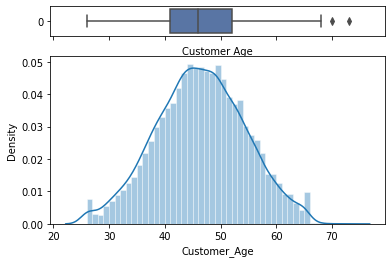

In [44]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")

# Add a graph in each part
sns.boxplot(data["Customer_Age"], ax=ax_box,orient="h")
sns.distplot(data["Customer_Age"], ax=ax_hist)
ax_box.set(xlabel='Customer Age')
plt.show()

**Observations:**
* The distribution of Customer_Age is normally distributed with mean and median at 46 years.
* From the boxplot, we can see that there are a few outliers.

#### **2.Months_on_book**

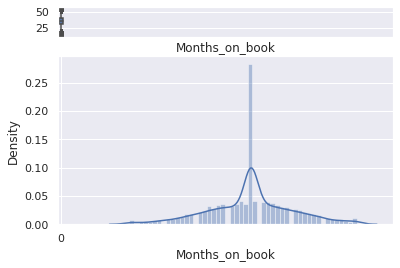

In [45]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data["Months_on_book"], ax=ax_box)
sns.distplot(data["Months_on_book"], ax=ax_hist)
ax_box.set(xlabel='Months_on_book')
plt.show()

**Observations:**
* Most customers are with the bank for 3 years.
* From the boxplot, we can see that there are outliers on both sides of the whiskers.

#### **3.Credit_Limit**

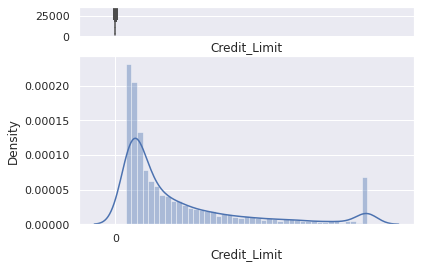

In [46]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data["Credit_Limit"], ax=ax_box)
sns.distplot(data["Credit_Limit"], ax=ax_hist)
ax_box.set(xlabel='Credit_Limit')
plt.show()

**Observations:**
* The distribution of the Credit_Limit is skewed to the right.
* There are quite a few customers with a maximum Credit Limit of 35000.
* 50% of the customers of the bank have a credit limit of less than <5000.

#### **4.Total_Revolving_Bal**

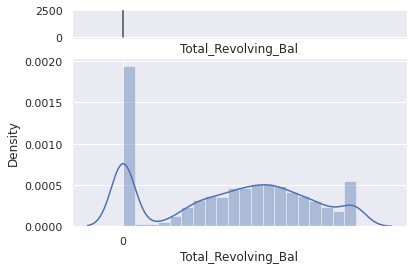

In [47]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data["Total_Revolving_Bal"], ax=ax_box)
sns.distplot(data["Total_Revolving_Bal"], ax=ax_hist)
ax_box.set(xlabel='Total_Revolving_Bal')
plt.show()

**Observations:**
* Most customers pay the complete dues of credit card and have 0 revolving balance.
* There are quite a few customers with a revolving balance of 2500.

#### **5.Avg_Open_To_Buy**

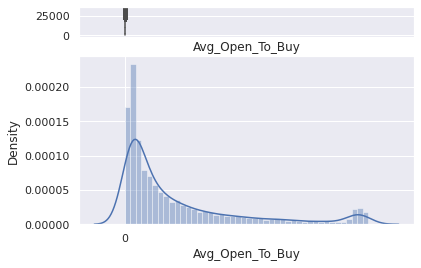

In [48]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data["Avg_Open_To_Buy"], ax=ax_box)
sns.distplot(data["Avg_Open_To_Buy"], ax=ax_hist)
ax_box.set(xlabel='Avg_Open_To_Buy')
plt.show()

**Observations:**
* The distribution of the Avg_Open_To_Buy column is right-skewed.
* A right-skewed distribution indicates that most customers used a big part of their limit while only a few customers (on the right tail) were left with a majority of their credit amount.

#### **6.Total_Trans_Ct**

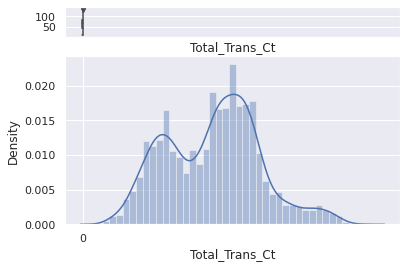

In [49]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data["Total_Trans_Ct"], ax=ax_box)
sns.distplot(data["Total_Trans_Ct"], ax=ax_hist)
ax_box.set(xlabel='Total_Trans_Ct')
plt.show()

**Observations:**
* The distribution of Total_Trans_Ct shows two peaks on 40 and 80 transactions in a year which indicates that customers used credit cards 3 to 6 times a month to make transactions.

#### **7.Total_Amt_Chng_Q4_Q1**

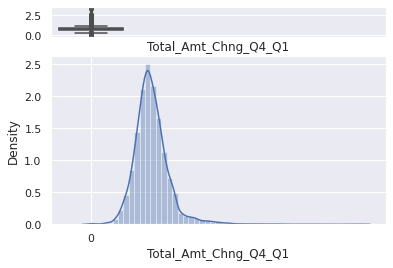

In [50]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data["Total_Amt_Chng_Q4_Q1"], ax=ax_box)
sns.distplot(data["Total_Amt_Chng_Q4_Q1"], ax=ax_hist)
ax_box.set(xlabel='Total_Amt_Chng_Q4_Q1')
plt.show()

**Observations:**
* The distribution of Total_Amt_Chng_Q4_Q1 looks normally distributed but there's a slight skew towards the right.
* From the boxplot, we can see that there are outliers on both sides of the whiskers.

#### **8.Total_Trans_Amt**

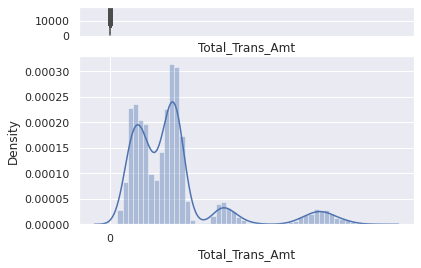

In [51]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data["Total_Trans_Amt"], ax=ax_box)
sns.distplot(data["Total_Trans_Amt"], ax=ax_hist)
ax_box.set(xlabel='Total_Trans_Amt')
plt.show()

**Observations:**
* The distribution of Total_Trans_Amt is skewed to the right.
* Data shows two peaks at total transaction amounts, one around 2500 and the other around the mean value of 4500.
* From the boxplot, we can see that there are outliers - customers with more than ~8000 total transaction amounts are being considered as outliers.
* It would be interesting to check if the customers spending less with the card are the ones churning or the ones spending more are churning, if the latter is the case then there is a problem for the bank as it is losing valuable customers.

#### **9.Total_Ct_Chng_Q4_Q1**

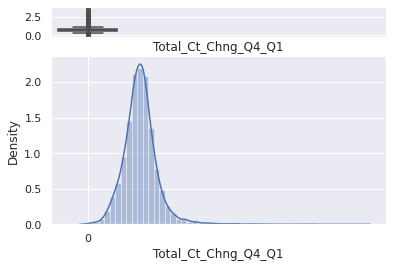

In [52]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data["Total_Ct_Chng_Q4_Q1"], ax=ax_box)
sns.distplot(data["Total_Ct_Chng_Q4_Q1"], ax=ax_hist)
ax_box.set(xlabel='Total_Ct_Chng_Q4_Q1')
plt.show()

**Observations:**
* The distribution of Total_Ct_Chng_Q4_Q1 looks normally distributed but there's a slight skew towards the right.
* From the boxplot, we can see that there are outliers on both sides of the whiskers.

#### **10.Avg_Utilization_Ratio**

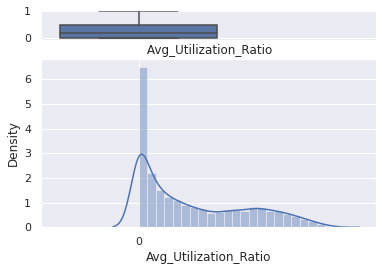

In [53]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data["Avg_Utilization_Ratio"], ax=ax_box)
sns.distplot(data["Avg_Utilization_Ratio"], ax=ax_hist)
ax_box.set(xlabel=' Avg_Utilization_Ratio')
plt.show()

**Observations:**
* The distribution of Avg_Utilization_Ratio is skewed to the right.
* This distribution is not a positive sign for the bank as most of the customers are not utilizing their credit amount.

**Credit limit, Average open to buy and Average utilization ratio are right-skewed**.

1. **Open to buy** means how much credit a customer is left with
   * Low values of Open to buy could represent either
       * Customers have low credit limits
       * Customers are spending a lot so they are left less open to buy
       

2. **Average utilization ratio** = (1 - (open to buy/credit limit))
   * Low values of the Average utilization ratio represents
        * (Open to buy/credit limit) is nearly equal to 1 -> Open to buy is nearly equal to the credit limit -> customers are spending less using their credit cards

3. **Credit limit** is also right-skewed which represents - most of the customers have low credit limits
 

Based on the three variables, we can conclude that the majority of customers have low credit limits and are not utilizing their credit cards frequently. Now this statement justifies the right skewness for all the three variables.

## **Bivariate Analysis**

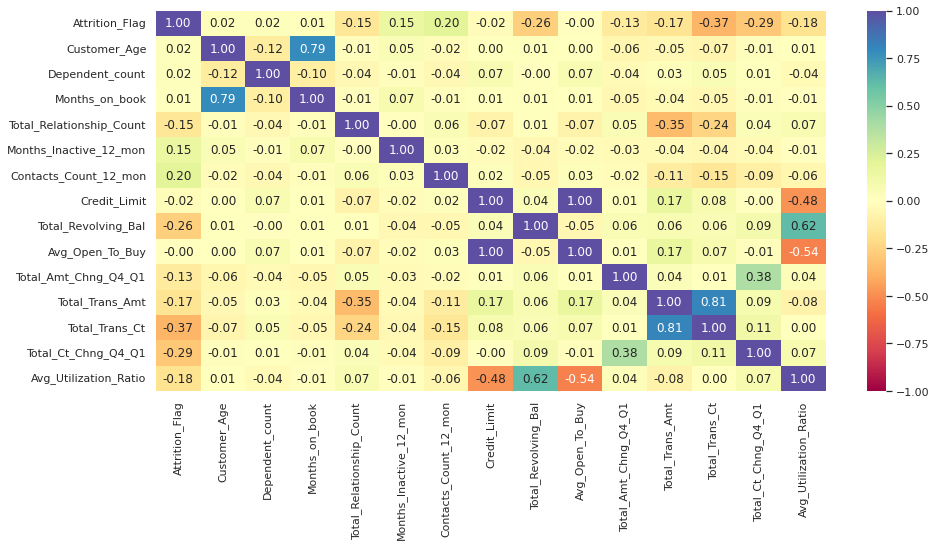

In [54]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations:**
* Attrition_Flag shows a bit of a negative correlation with **Total_Trans_Ct (total transactions)** and **Total_Trans_Amt (total transaction amount)**.
* There's a strong positive correlation between **Months_on_book** and **Customer_Age**, **Total_Revolving_Bal** and **Avg_Utilization_Ratio**, **Total_Trans_Amt** and **Total_Trans_Ct**.
* There's a negative correlation of **Total_Relationship_count** with **Total_Trans_Amt** and **Total_Trans_Ct**, **Avg_Utilization_Ratio** with **Avg_Open_To_Buy** and **Credit_Limit**.

### **Attrition_Flag vs Gender**

In [55]:
import plotly.express as px
temp=(pd.crosstab(data['Gender'],data['Attrition_Flag'],normalize='index')*100).unstack().reset_index()
fig = px.bar(temp, x="Gender", y=0, color="Attrition_Flag", text_auto=True)
fig.show()

Text(0, 0.5, 'Percentage Attrition %')

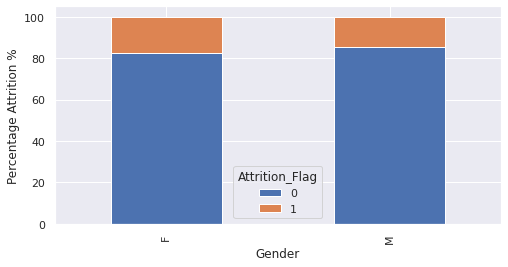

In [56]:
(pd.crosstab(data['Gender'],data['Attrition_Flag'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Attrition %')

**Observations:**
* There's not much difference in attrition percentages for Males and Females.
* ~20% of both Males and Females attrite.

### **Attrition_Flag vs Marital_Status**

In [57]:
temp=(pd.crosstab(data['Marital_Status'],data['Attrition_Flag'],normalize='index')*100).unstack().reset_index()
temp

,Attrition_Flag,Marital_Status,0
0,0,Divorced,83.82353
1,0,Married,84.87305
2,0,Single,83.05858
3,1,Divorced,16.17647
4,1,Married,15.12695
5,1,Single,16.94142


Text(0, 0.5, 'Percentage Attrition %')

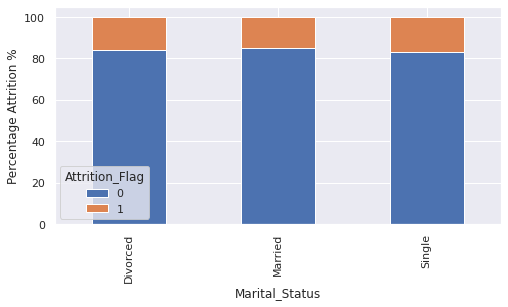

In [58]:
(pd.crosstab(data['Marital_Status'],data['Attrition_Flag'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Attrition %')

**Observations:**
* There's not much difference in attrition percentages for Marital_Status.
* ~20% of Singles, Divorced attrite.
* Married customers attrite the least.

### **Attrition_Flag vs Education_Level**

In [59]:
temp=(pd.crosstab(data['Education_Level'],data['Attrition_Flag'],normalize='index')*100).unstack().reset_index()
temp

,Attrition_Flag,Education_Level,0
0,0,College,84.79763
1,0,Doctorate,78.93570
2,0,Graduate,84.43095
3,0,High School,84.79881
4,0,Post-Graduate,82.17054
5,0,Uneducated,84.06187
6,1,College,15.20237
7,1,Doctorate,21.06430
8,1,Graduate,15.56905
9,1,High School,15.20119


Text(0, 0.5, 'Percentage Attrition %')

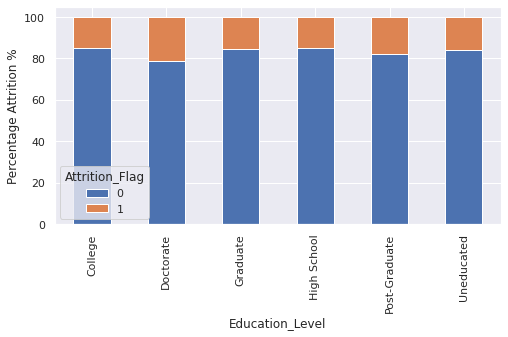

In [60]:
(pd.crosstab(data['Education_Level'],data['Attrition_Flag'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Attrition %')

**Observations:**
* Customers with higher education -  Doctorates and Post Graduates are the ones most (~20% for both education levels) attriting.

### **Attrition_Flag vs Income_Category**

In [61]:
temp=(pd.crosstab(data['Income_Category'],data['Attrition_Flag'],normalize='index')*100).unstack().reset_index()
temp

,Attrition_Flag,Income_Category,0
0,0,$120K +,82.66850
1,0,$40K - $60K,84.86034
2,0,$60K - $80K,86.51926
3,0,$80K - $120K,84.23453
4,0,Less than $40K,82.81382
5,0,abc,83.18345
6,1,$120K +,17.33150
7,1,$40K - $60K,15.13966
8,1,$60K - $80K,13.48074
9,1,$80K - $120K,15.76547


Text(0, 0.5, 'Percentage Attrition %')

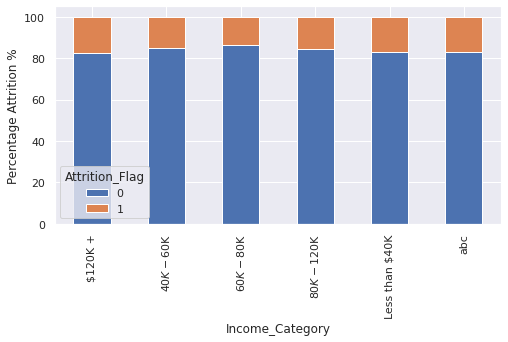

In [62]:
(pd.crosstab(data['Income_Category'],data['Attrition_Flag'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Attrition %')

**Observations:**
* The customers from two extreme income groups - Earning less than 40K and Earning more than 120k+ are the ones attriting the most.

### **Attrition_Flag vs Card_Category**

In [63]:
temp=(pd.crosstab(data['Card_Category'],data['Attrition_Flag'],normalize='index')*100).unstack().reset_index()
temp

,Attrition_Flag,Card_Category,0
0,0,Blue,83.90208
1,0,Gold,81.89655
2,0,Platinum,75.00000
3,0,Silver,85.22523
4,1,Blue,16.09792
5,1,Gold,18.10345
6,1,Platinum,25.00000
7,1,Silver,14.77477


Text(0, 0.5, 'Percentage Attrition %')

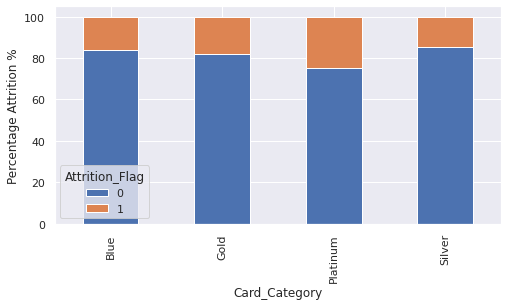

In [64]:
(pd.crosstab(data['Card_Category'],data['Attrition_Flag'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Attrition %')

**Observations:**
* ~35% of attrition is amongst the customers with platinum cards followed by ~30% attrition in Gold cards.
* Customers with Platinum and Gold cards are our premium customers and the highest attrition for these customers is alarming as they are using the premium card provided by the bank.

### **Attrition_Flag vs Contacts_Count_12_mon**

Text(0, 0.5, 'Percentage Attrition %')

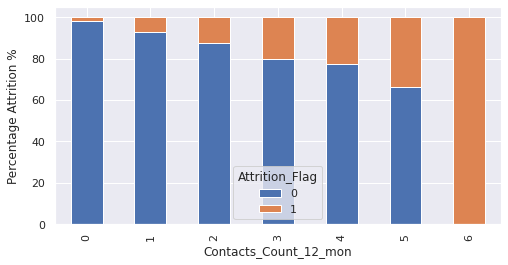

In [65]:
(pd.crosstab(data['Contacts_Count_12_mon'],data['Attrition_Flag'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Attrition %')

**Observations:**
* Highest attrition is among the customers who interacted the most with the bank.
* This signifies that the bank is not able to resolve the problems faced by customers leading to attrition.
* A preliminary step to identify attriting customers would be to look out for customers who have reached out to them repeatedly.

### **Attrition_Flag vs Months_Inactive_12_mon**

Text(0, 0.5, 'Percentage Attrition %')

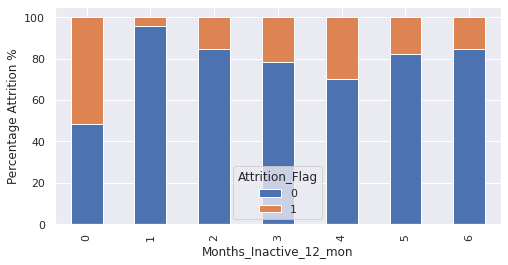

In [66]:
(pd.crosstab(data['Months_Inactive_12_mon'],data['Attrition_Flag'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Attrition %')

**Observations:**
* As inactivity increases attrition also increases (2-4 months).
* The interpretation from here for 0 months to 6 months is difficult as customers who recently used the card attrited the most while those who were inactive for 6 months attrited less.

### **Attrition_Flag vs Total_Relationship_Count**

Text(0, 0.5, 'Percentage Attrition %')

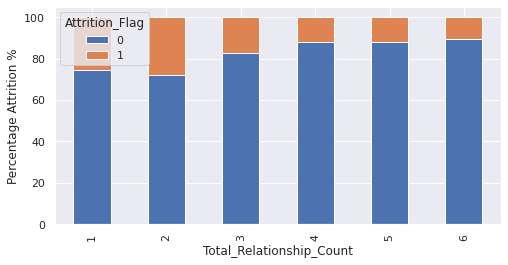

In [67]:
(pd.crosstab(data['Total_Relationship_Count'],data['Attrition_Flag'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Attrition %')

**Observations:**
* Attrition is highest among the customers who are using 1 or 2 products offered by the bank - together they constitute ~55% of the attrition.
* Customers who use more than 3 products are the ones least attriting, such customers might be more financially stable and actively invest in different services provided by the bank.

### **Attrition_Flag vs Dependent_count**

Text(0, 0.5, 'Percentage Attrition %')

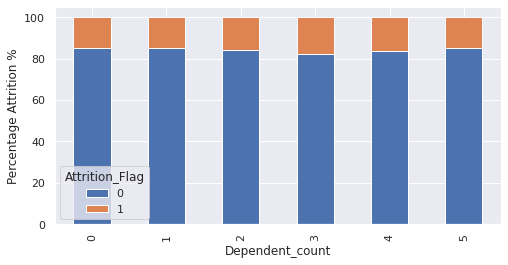

In [68]:
(pd.crosstab(data['Dependent_count'],data['Attrition_Flag'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Attrition %')

**Observations:**
* More the number of dependents more is the attrition, more responsibilities might lead to financial instability in such customers.
* Attrition is fairly low for customers with 0 or 1 dependents.

### **Let's find the percentage of outliers, in each column of the data, using IQR.**

In [69]:
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (Q1 - 1.5 * IQR)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [70]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

Attrition_Flag             16.06596
Customer_Age                0.01975
Dependent_count             0.00000
Months_on_book              3.81159
Total_Relationship_Count    0.00000
Months_Inactive_12_mon      3.26849
Contacts_Count_12_mon       6.21112
Credit_Limit                9.71660
Total_Revolving_Bal         0.00000
Avg_Open_To_Buy             9.50923
Total_Amt_Chng_Q4_Q1        3.91034
Total_Trans_Amt             8.84764
Total_Trans_Ct              0.01975
Total_Ct_Chng_Q4_Q1         3.89059
Avg_Utilization_Ratio       0.00000
dtype: float64

**Observations:**
* After identifying outliers, we can decide whether to remove/treat them or not. It depends on one's approach, here we are not going to treat them as there will be outliers in real case scenario (in age, the total amount of transactions, number of transactions, etc) and we would want our model to learn the underlying pattern for such customers.

### **Missing value imputation**
- We will first replace 'abc' values with 'np.nan' in Income_Category.
- We will impute missing values in all 3 columns using mode.

In [71]:
data1 = data.copy()

In [72]:
data1["Income_Category"].replace("abc", np.nan, inplace=True)

In [73]:
data1.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [74]:
data1.shape[0]-data1.dropna().shape[0]

3046

**Separating the independent variables (X) and the dependent variable (Y)**

In [75]:
X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"]

**Splitting the data into 70% train and 30% test set**

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [76]:
# Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

**Missing Values Imputation**

In [77]:
# Columns to impute
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

# Simple Imputer with Mode
imputer = SimpleImputer(strategy="most_frequent")

# Fit on the train data
imputer.fit(X_train[reqd_col_for_impute])

# Transform the train data
X_train[reqd_col_for_impute] = imputer.transform(X_train[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [78]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

**Observations:**
* All missing values have been treated.

In [79]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3770
M    3318
Name: Gender, dtype: int64
******************************
Graduate         3247
High School      1425
Uneducated       1031
College           709
Post-Graduate     364
Doctorate         312
Name: Education_Level, dtype: int64
******************************
Married     3815
Single      2771
Divorced     502
Name: Marital_Status, dtype: int64
******************************
Less than $40K    3273
$40K - $60K       1254
$80K - $120K      1084
$60K - $80K        974
$120K +            503
Name: Income_Category, dtype: int64
******************************
Blue        6621
Silver       375
Gold          78
Platinum      14
Name: Card_Category, dtype: int64
******************************


In [80]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3770
M    3318
Name: Gender, dtype: int64
******************************
Graduate         3247
High School      1425
Uneducated       1031
College           709
Post-Graduate     364
Doctorate         312
Name: Education_Level, dtype: int64
******************************
Married     3815
Single      2771
Divorced     502
Name: Marital_Status, dtype: int64
******************************
Less than $40K    3273
$40K - $60K       1254
$80K - $120K      1084
$60K - $80K        974
$120K +            503
Name: Income_Category, dtype: int64
******************************
Blue        6621
Silver       375
Gold          78
Platinum      14
Name: Card_Category, dtype: int64
******************************


### **Encoding categorical variables**

In [81]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 29) (3039, 29)


**Observations:**
* After encoding there are 29 columns.

In [82]:
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
4124,50,1,43,6,1,2,7985.00000,0,7985.00000,1.03200,3873,72,0.67400,0.00000,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4686,50,0,36,3,3,2,5444.00000,2499,2945.00000,0.46800,4509,80,0.66700,0.45900,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1276,26,0,13,6,3,4,1643.00000,1101,542.00000,0.71300,2152,50,0.47100,0.67000,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0
6119,65,0,55,3,3,0,2022.00000,0,2022.00000,0.57900,4623,65,0.54800,0.00000,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2253,46,3,35,6,3,4,4930.00000,0,4930.00000,1.01900,3343,77,0.63800,0.00000,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0


### **Model evaluation criterion**

**The model can make two types of wrong predictions:**
1. Predicting a customer will attrite and the customer doesn't attrite.
2. Predicting a customer will not attrite and the customer attrites.

**Which case is more important?**
* Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset. 

**How to reduce this loss i.e the need to reduce False Negatives?**
* **Bank would want `Recall` to be maximized**, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives (i.e. Class 1) so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

                                Predictions 
                      Churn(1)               Stay(0)
Actual   Churn          TP                      FN

         Stay           FP                      TN




in your test data, assume you have 200 examples
out of 200, 50 people actually churn 


You made a ML model

Out of those 50, you were able to predict 35 correct as churning 

What is your recall 70% recall


You made a ML model

Your model predicts 60 will churn, out of which only 42 are correct. 

what is your precision ? 70% is precison

In [83]:
# Creating metric function 

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Attrite', 'Attrite'], yticklabels=['Not Attrite', 'Attrite'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## **Building the model**

We will be building 4 different models:

- **Logistic Regression**
- **Support Vector Machine(SVM)**
- **Decision Tree**
- **Random Forest**


### **Logistic Regression Model**

- Logistic Regression is a supervised learning algorithm that is used for **binary classification problems** i.e. where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event y, given some features x as:

                                          P(y)=1/exp(1 + exp(-x))

In [84]:
# Fitting logistic regression model

lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

**Let's check the model performance**

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      5949
           1       0.69      0.44      0.53      1139

    accuracy                           0.88      7088
   macro avg       0.79      0.70      0.73      7088
weighted avg       0.87      0.88      0.87      7088



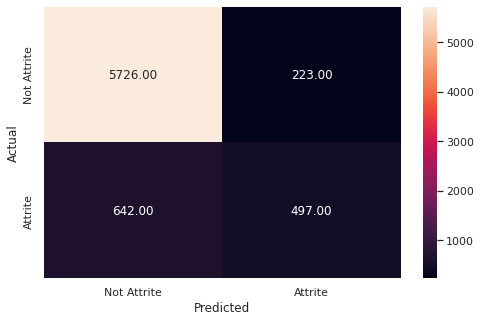

In [85]:
# Checking the performance on the training data

y_pred_train = lg.predict(X_train)

metrics_score(y_train, y_pred_train)

- The reported average includes the macro average which averages the unweighted mean per label, and the weighted average i.e. averaging the support-weighted mean per label.
- In classification, the class of interest is considered the positive class. Here, the class of interest is 1 i.e. identifying  the customers who are at risk of attrition.

**Reading the confusion matrix (clockwise):**

* True Negative (Actual=0, Predicted=0): Model predicts that a customer would not attrite and the customer does not attrite 

* False Positive (Actual=0, Predicted=1): Model predicts that a customer would attrite but the customer does not attrite

* False Negative (Actual=1, Predicted=0): Model predicts that a customer would not attrite but the customer attrites

* True Positive (Actual=1, Predicted=1): Model predicts that a customer would attrite and the customer attrites

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2551
           1       0.70      0.44      0.54       488

    accuracy                           0.88      3039
   macro avg       0.80      0.70      0.74      3039
weighted avg       0.87      0.88      0.87      3039



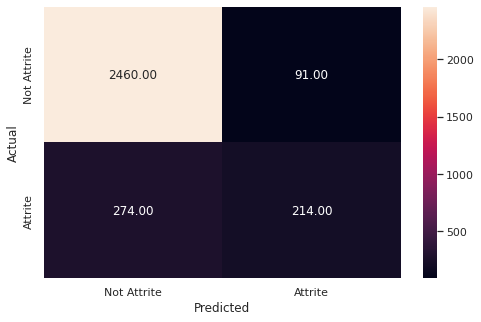

In [86]:
# Checking the performance on the test dataset

y_pred_test = lg.predict(X_test)

metrics_score(y_test, y_pred_test)

**Observations:**
- **We are getting an accuracy of around 90%** on train and test dataset.
- However, **the recall for this model is only around 44% for class 1 on train and test dataset.**
- As the recall is low, **this model will not perform well** in differentiating out those customers who have a high chance of leaving the bank, meaning it will eventually not help in reducing the attrition rate. 
- As we can see from the Confusion Matrix, **this model fails to identify the majority of customers who will attrite.**

**Let's check the coefficients and find which variables are leading to attrition and which can help to reduce the attrition**:

In [87]:
# Printing the coefficients of logistic regression

cols=X_train.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

,0
Contacts_Count_12_mon,0.31531
Months_Inactive_12_mon,0.24919
Dependent_count,0.20002
Customer_Age,0.11755
Income_Category_Less than $40K,0.05269
Marital_Status_Single,0.04579
Education_Level_Graduate,0.01085
Education_Level_Post-Graduate,0.00870
Education_Level_Doctorate,0.00737
Education_Level_Uneducated,0.00455


**Observations:**


**Features which positively affect on the attrition rate are:**
- Contacts_Count_12_mon
- Months_Inactive_12_mon
- Dependent_count
- Customer_Age
- Income_Category_Less than $40K	
- Marital_Status_Single
- Education_Level_Graduate	
- Education_Level_Post-Graduate
- Education_Level_Doctorate
- Avg_Utilization_Ratio

**Features which negatively affect on the attrition rate are:**
- Total_Relationship_Count	
- Total_Trans_Ct
- Months_on_book
- Total_Ct_Chng_Q4_Q1
- Marital_Status_Married
- Income_Category_ 60𝐾− 80K
- Total_Amt_Chng_Q4_Q1


**Observations:**

- Based on the Logistic Regression model, **Contacts_Count_12_mon is the most important feature** in detecting whether a customer would attrite or not. So, the highest attrition is among the customers who interacted the most with the bank.
This signifies that the bank is not able to resolve the problems faced by customers leading to attrition
- **This model also suggests that attrition is dependent on the customers' activity.** As inactivity increases attrition also increases.
- **Dependent_count is an important variable in predicting the attrition rate.** As more the number of dependents more is the attrition, more responsibilities might lead to financial instability in such customers.
- Education level of customers also have some interesting outcome. Customers with higher education - Doctorates and Post Graduates are the ones most attriting.
- The customers belonging to the income group - Earning less than 40K are the ones attriting the most.
- Other features which appear to affect the chances of attrition are Marital Status, Avg Utilization ratio.

- The model also captures the **inverse relation between Total_Relationship_Count and attrition** - suggesting customer who uses more number of products from the bank are the ones least attriting, such customers might be more financially stable and actively invest in different services provided by the bank.
-  **Customers who are doing more transactions with the bank have a lower chance of attrition**, a conclusion that makes sense since Less number of transactions leads to higher attrition.
- From Total_Ct_Chng_Q4_Q1 and Total_Amt_Chng_Q4_Q1 it's clear that Customers who didn't attrite showed less variability across Q4 to Q1 as compared to the ones who attrited.

The coefficients of the **logistic regression** model give us the **log of odds**, which is hard to interpret in the real world. We can convert the **log of odds into real odds** by taking its exponential.

In [88]:
# Finding the odds
odds = np.exp(lg.coef_[0])

# Adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train.columns, columns=['odds']).sort_values(by='odds', ascending=False) 

,odds
Contacts_Count_12_mon,1.37069
Months_Inactive_12_mon,1.28299
Dependent_count,1.22143
Customer_Age,1.12474
Income_Category_Less than $40K,1.05410
Marital_Status_Single,1.04686
Education_Level_Graduate,1.01091
Education_Level_Post-Graduate,1.00874
Education_Level_Doctorate,1.00739
Education_Level_Uneducated,1.00456


**Observations**
- The odds of a customers contacting with the bank more to attrite are **1.3 times** the odds of one who is not, probably due to the fact that the bank is not able to resolve the problems faced by customers leading to attrition.
- The odds of a customer being inactive to attrite are **1.2 times** the odds of a customer who is actively in touch with bank.
- The odds of a customer with more dependent attriting are **1.2 times** the odds of a customer with less or no dependent.

### **Precision-Recall Curve for logistic regression**

**Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.**

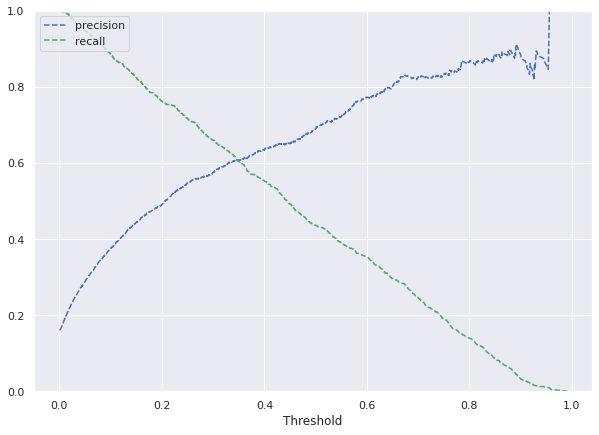

In [89]:
# Predict_proba gives the probability of each observation belonging to each class

y_scores_lg=lg.predict_proba(X_train)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [90]:
# Calculating the exact threshold where precision and recall are equal.

for i in np.arange(len(thresholds_lg)):
    if precisions_lg[i]==recalls_lg[i]:
        print(thresholds_lg[i])

0.34806960434560535


**Observation:**
- We can see that precision and recall are balanced for a threshold of about ~**0.35**.

**Let's find out the performance of the model at this threshold**

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      5949
           1       0.61      0.60      0.61      1139

    accuracy                           0.87      7088
   macro avg       0.77      0.76      0.77      7088
weighted avg       0.87      0.87      0.87      7088



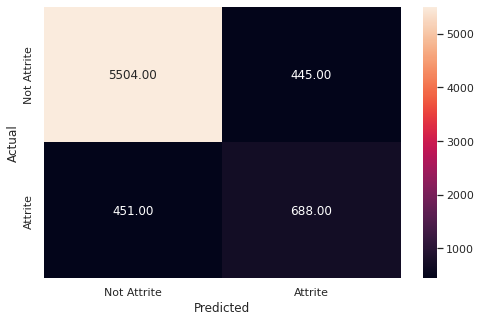

In [91]:
optimal_threshold=.35
y_pred_train = lg.predict_proba(X_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

**Observations:**
- The model performance has improved. The recall has increased significantly for class 1.


**Let's check the performance on the test data.**

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2551
           1       0.62      0.60      0.61       488

    accuracy                           0.88      3039
   macro avg       0.77      0.77      0.77      3039
weighted avg       0.88      0.88      0.88      3039



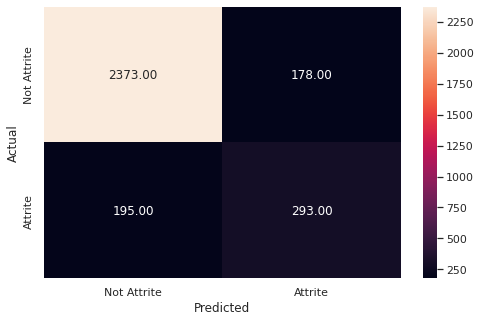

In [92]:
optimal_threshold1=.35
y_pred_test = lg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

**Observation:**
- The model is giving a **similar performance on the test and train data** i.e. the model is giving a generalized performance.
- **The recall of the test data has increased significantly** while at the same time, the precision has decreased slightly, which is to be expected while adjusting the threshold.
- The average recall and precision for the model are good but let's see if we can get better performance using other algorithms. 

### **Support Vector Machines**

In [93]:
# To Speed-Up SVM training.

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

Let's build the models using the two of the widely used kernel functions:

1.   **Linear Kernel**
2.   **RBF Kernel**

#### **Linear Kernel**

In [94]:
# Fitting SVM
svm = SVC(kernel = 'linear') # Linear kernel or linear decision boundary
model = svm.fit(X = X_train_scaled, y = y_train)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5949
           1       0.80      0.58      0.67      1139

    accuracy                           0.91      7088
   macro avg       0.86      0.77      0.81      7088
weighted avg       0.90      0.91      0.90      7088



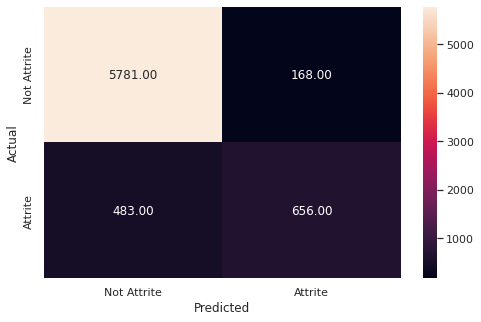

In [95]:
y_pred_train_svm = model.predict(X_train_scaled)

metrics_score(y_train, y_pred_train_svm)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2551
           1       0.78      0.56      0.65       488

    accuracy                           0.90      3039
   macro avg       0.85      0.76      0.80      3039
weighted avg       0.90      0.90      0.90      3039



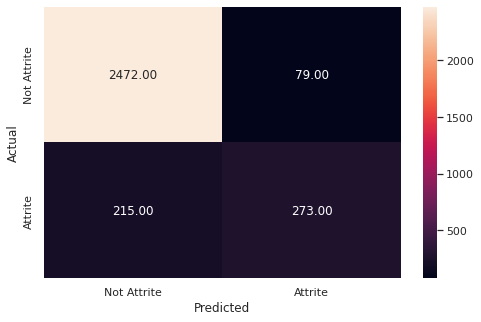

In [96]:
# Checking performance on the test data
y_pred_test_svm = model.predict(X_test_scaled)
metrics_score(y_test, y_pred_test_svm)

* SVM model with linear kernel is not overfitting as the accuracy is around 90% for both train and test dataset.
* Recall of class 1 for the model is only around 55% which implies our model will not correctly predict the customers who are likely to attrite. 
* The precision is quite good and the model will help to find true positive and will save the cost and energy of the bank. 

#### **RBF Kernel**

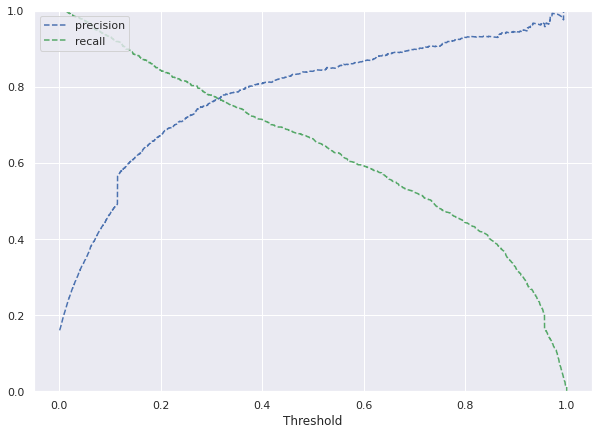

In [97]:
svm_rbf=SVC(kernel='rbf',probability=True)
svm_rbf.fit(X_train_scaled,y_train)
y_scores_svm=svm_rbf.predict_proba(X_train_scaled) # Predict_proba gives the probability of each observation belonging to each class


precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [98]:
# Calculating the exact threshold where precision and recall are equal.
for i in np.arange(len(thresholds_svm)):
    if precisions_svm[i]==recalls_svm[i]:
        print(thresholds_svm[i])

0.31258137950391657


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5949
           1       0.77      0.77      0.77      1139

    accuracy                           0.93      7088
   macro avg       0.86      0.86      0.86      7088
weighted avg       0.93      0.93      0.93      7088



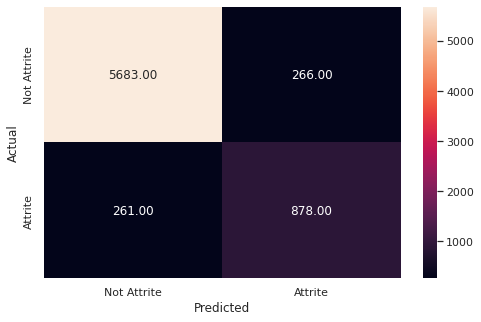

In [99]:
optimal_threshold1=0.31
y_pred_train = svm_rbf.predict_proba(X_train_scaled)

metrics_score(y_train, y_pred_train[:,1]>optimal_threshold1)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2551
           1       0.67      0.71      0.69       488

    accuracy                           0.90      3039
   macro avg       0.80      0.82      0.81      3039
weighted avg       0.90      0.90      0.90      3039



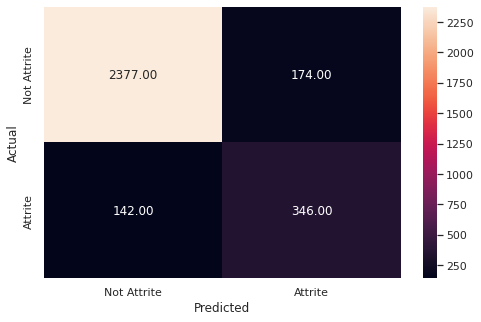

In [100]:
y_pred_test = svm_rbf.predict_proba(X_test_scaled)

metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

**Observations:**
* At the optimal threshold of .31, the model performance has improved significantly. The recall has improved from 0.55 to .77 which is a ~20% increase and the model is giving good generalized results. 
* Moreover, the kernel used to create this is rbf, hence model is performing good with non-linear kernel.
* As the recall is good, **this model will perform well** in differentiating out those customers who have a high chance of leaving the bank, meaning it will eventually help in reducing the attrition rate. 

### **Decision Tree**


In [101]:
# Building decision tree model

model_dt= DecisionTreeClassifier(random_state=1,max_depth=8)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

**Let's check the model performance of decision tree**

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5949
           1       0.93      0.92      0.93      1139

    accuracy                           0.98      7088
   macro avg       0.96      0.95      0.96      7088
weighted avg       0.98      0.98      0.98      7088



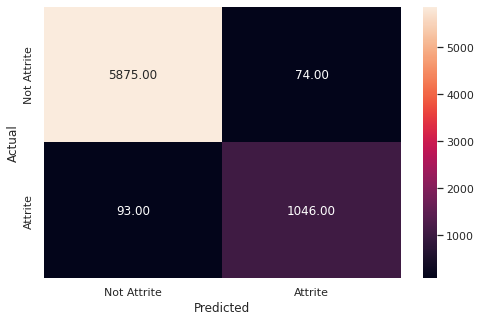

In [102]:
# Checking performance on the training dataset

pred_train_dt = model_dt.predict(X_train)

metrics_score(y_train, pred_train_dt)

**Observation:**
* Model has performed very well on the training set.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.

**Let's check the performance on test data to see if the model is overfitting.**

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2551
           1       0.82      0.82      0.82       488

    accuracy                           0.94      3039
   macro avg       0.89      0.89      0.89      3039
weighted avg       0.94      0.94      0.94      3039



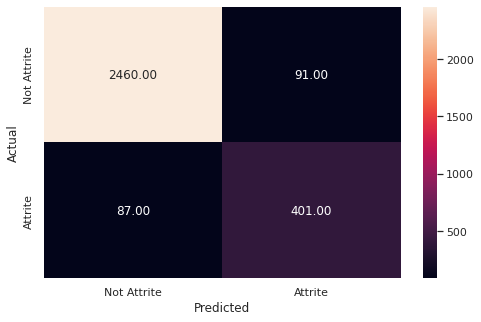

In [103]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

**Observation:**
* The decision tree model is slightly overfitting the data here.
* We can tune the hyperparameters to increase the performance and reduce overfitting.

**Let's visualize the decision tree** and observe the decision rules:

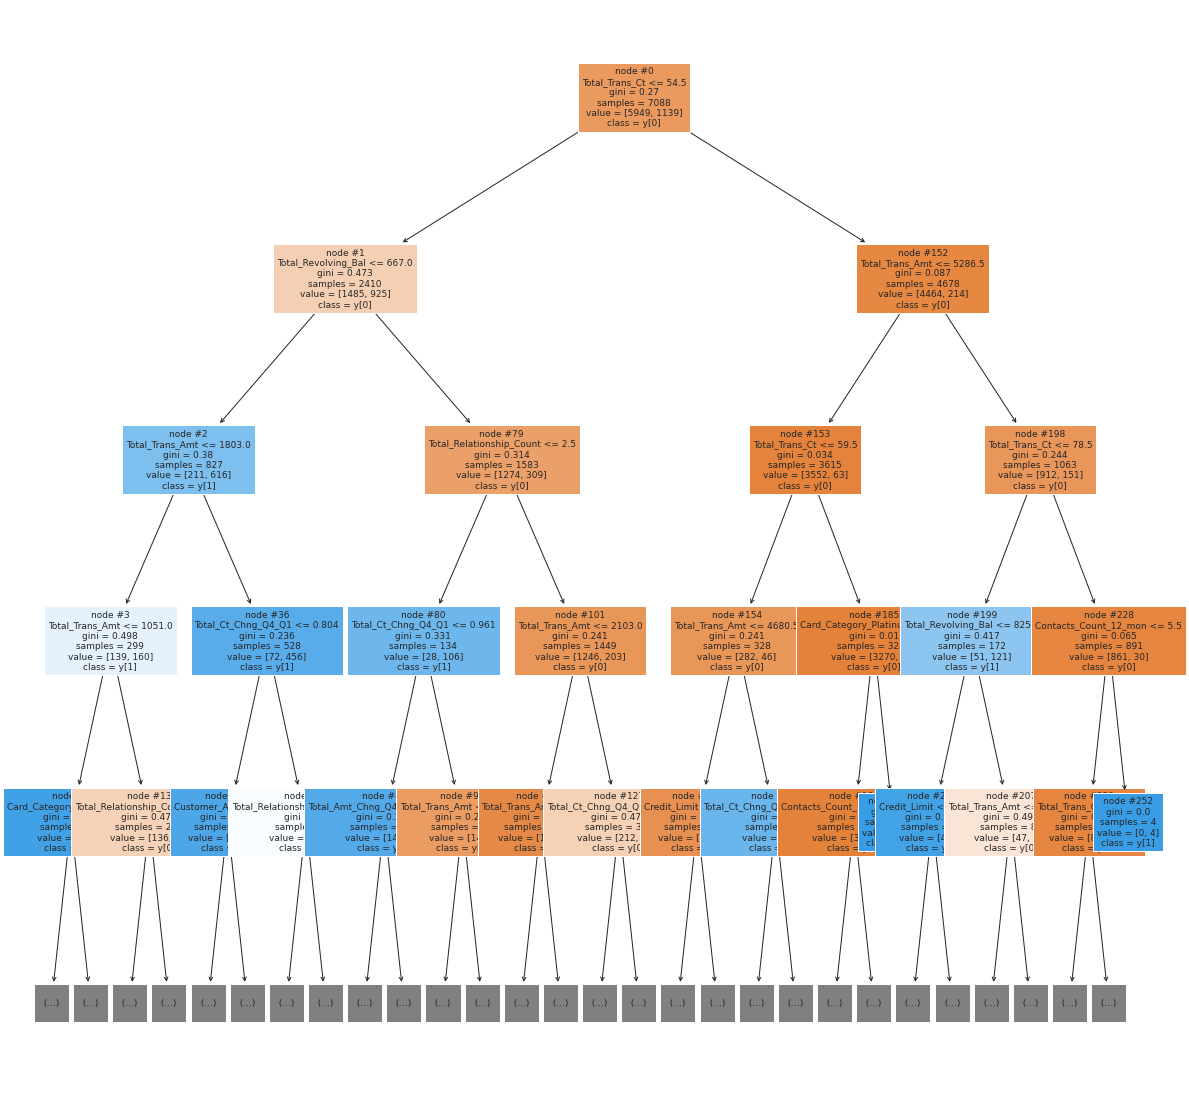

In [104]:
features = list(X_train.columns)

plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(model_dt,feature_names=features,
               max_depth =4, 
               filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

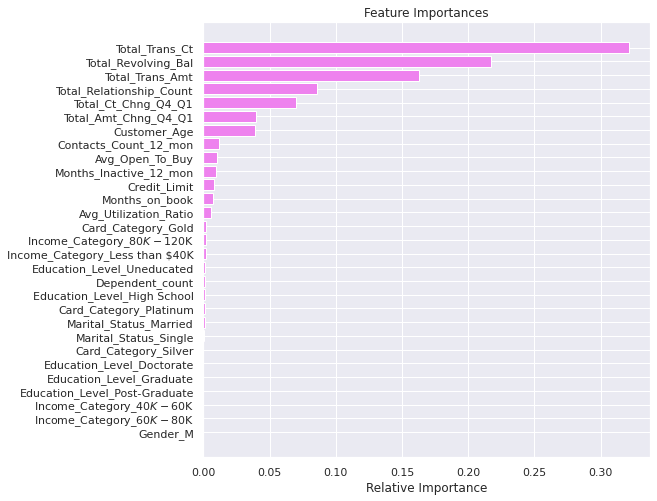

In [105]:
# Importance of features in the tree building

feature_names = list(X_train.columns)
importances = model_dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation:**
- **So,Total_Trans_Ct  is the most important feature** **followed by Total_Revolving_Bal and Total_Trans_Amt** which makes sense. Customers who are doing more transactions with the bank have lower chance of attrition.
- **Total_Ct_Chng_Q4_Q1, Total_Relationship_Count, Total_Amt_Chng_Q4_Q1 are also  important factors** .

### **Random Forest**

In [106]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5949
           1       1.00      1.00      1.00      1139

    accuracy                           1.00      7088
   macro avg       1.00      1.00      1.00      7088
weighted avg       1.00      1.00      1.00      7088



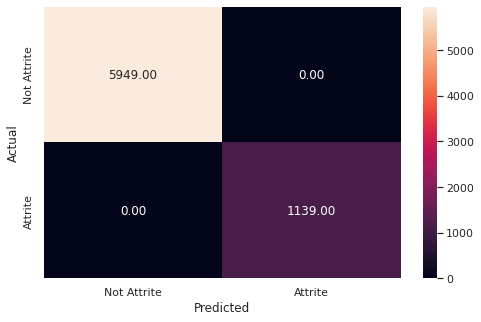

In [107]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

**Observation:**
- For all the metrics in the training dataset, the Random Forest gives a 100% score.

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2551
           1       0.92      0.79      0.85       488

    accuracy                           0.96      3039
   macro avg       0.94      0.89      0.91      3039
weighted avg       0.95      0.96      0.95      3039



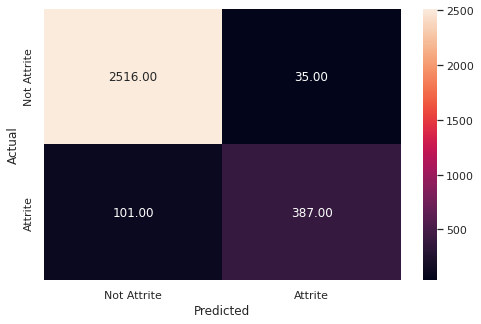

In [108]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Observations:**

- The Random Forest classifier **seems to be overfitting the training data**. The recall on the training data is 1, while the recall on the test data is only ~ 0.80 for class 1.
- Precision is high for the test data as well. 

**Let's check the feature importance of the Random Forest**

In [109]:
importances = rf_estimator.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

TypeError: ignored

<Figure size 936x936 with 0 Axes>

**Observations:**
- The Random Forest further verifies the results from the decision tree that the most important features are `Total_Trans_ct` and `Total_Trans_Amt`.

## **Business Recommendations:**


* We have been able to build a predictive model:

  a) that the bank can deploy to identify customers who are at risk of attrition.
  
  b) that the bank can use to find the key causes that drive attrition. 
  
  c) based on which the bank can take appropriate actions to build better retention policies for customers.
  

* Factors that drive attrition - Total_Trans_Ct, Total_Revolving_Bal, Total_Trans_Amt, Total_Relationship_Count

* Total_Trans_Ct: Less number of transactions in a year leads to attrition of a customer - to increase the usage of cards the bank can provide offers like cashback, special discounts on the purchase of something, etc so that customers feel motivated to use their cards.

* Total_Revolving_Bal: Customers with less total revolving balance are the ones who attrited, such customers must have cleared their dues and opted out of the credit card service. After the customer has cleared the dues bank can ask for feedback on their experience and get to the cause of attrition.

* Total_Trans_Amt: Less number of transactions can lead to less transaction amount and eventually leads to customer attrition - Bank can provide offers on the purchase of costlier items which in turn will benefit the customers and bank both.

* Total_Relationship_Count: Attrition is highest among the customers who are using 1 or 2 products offered by the bank - together they constitute ~55% of the attrition - Bank should investigate here to find the problems customers are facing with these products. Customer support, or more transparency can help in retaining customers.

* Female customers should be the target customers for any kind of marketing campaign as they are the ones who utilize their credits, make more and higher amount transactions. But their credit limit is less, so increasing the credit limit for such customers can profit the bank.

* Months_Inactive: As inactivity increases the attrition also increases. 2-4 months of inactivity are the biggest contributors of attrition - Bank can send automated messages to engage customers, these messages can be about their monthly activity, new offers or services, etc.

* Highest attrition is among the customers who interacted/reached out the most with/to the bank, this indicates that the bank is not able to resolve the problems faced by customers leading to attrition - a feedback collection system can be set up to check if the customers are satisfied with the resolution provided, if not, the bank should act upon it accordingly.